# SciPy Essentials

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%config InlineBackend.figure_format = 'svg'

A lot of the **scipy** material is built on top of **numpy** and it comprises a lot of extremely optimized functions for numerical computing that are commonly used across all branches of mathematics, physics, engineering, and many other fields. The **scipy** library is built to work with **numpy** arrays and provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

## Basics

### Optimization

Minimize the function $f(x) = (x - 3)^2$ 

In [3]:
from scipy.optimize import minimize

def f(x):
    return (x-3)**2

initial_guess = 2
res = minimize(f, initial_guess)
print(res)

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])


Minimize the function $f(x,y) = (x - 1)^2 + (y - 2.5)^2$ subject to the constraints

$x - 2y + 2 \geq 0$

$ -x - 2y + 6 \geq 0$

$ -x + 2y + 2 \geq 0$

$x \geq 0$

$y \geq 0$

Here's the approach to use for constrained optimization:

+ 2D function takes in vector $x$
+ Constraints must be specified as $g_i(x) \geq 0$
+ Bounds must be specified as rectangular regions

In [4]:
#f = lambda x: (x[0] -1)**2 + (x[1] - 2.5)**2

def f(v):
    return (v[0] -1)**2 + (v[1] - 2.5)**2

cons1 = lambda v: v[0] - 2*v[1] + 2
cons2 = lambda v: -v[0] - 2*v[1] + 6
cons3 = lambda v: -v[0] + 2*v[1] + 2
constr = ({'type': 'ineq', 'fun': cons1},
               {'type': 'ineq', 'fun': cons2},
               {'type': 'ineq', 'fun': cons3},
               ) # tuple of dictionaries defining the inequality constraints
bnds = ((0, None), (0, None)) # tuple of two tuples going from 0 to infinity each

res = minimize(f, (2, 0), bounds=bnds, constraints=constr)
print(res)

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])


You can look at the documentation for any function using the `?` operator.

In [5]:
#minimize?

## Interpolation

SciPy provides a number of functions for interpolation, which are extremely useful for experimental data analysis. 

Suppose you have a set of data points like this:

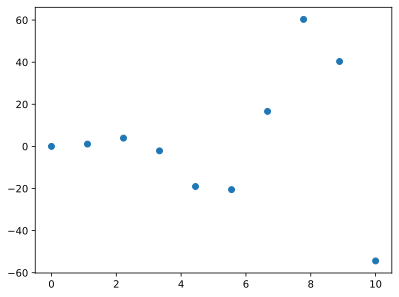

In [6]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x, y)

Your goal is to know all the values in between the scattered points. You can use the `interp1d` function to interpolate the data.

In [7]:
from scipy.interpolate import interp1d

In [8]:
f = interp1d(x, y, kind='cubic') # way better than linear!
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

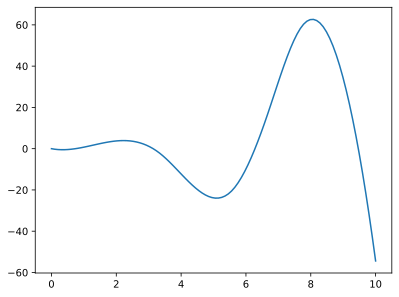

In [9]:
plt.plot(x_dense, y_dense)

## Curve Fitting

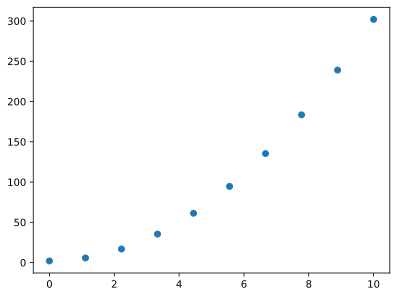

In [10]:
# Trivial example
x_data = np.linspace(0, 10, 10)
y_data = 3 * x_data**2 + 2
plt.scatter(x_data, y_data)

Given the obvious shape of the dataset, we can assume it can be fit by the curve $y = ax^2 + b$, using the `curve_fit` function. This is a trivial example, but it illustrates the basic idea of curve fitting, which can be useful in more complicated situations.

In [11]:
from scipy.optimize import curve_fit

def f(x, a, b):
    return a*x**2 + b

p_optimal, p_covariance = curve_fit(f, x_data, y_data, p0=(1,1))

print(p_optimal)       # returns the optimal a and b values for fitting
print(p_covariance)    # returns the error in terms of covariance

[3. 2.]
[[ 4.13297331e-34 -1.45419433e-32]
 [-1.45419433e-32  9.65872308e-31]]


Let's see a more physical example. The equation for spring motion is $y(t) = A \cos(\omega t + \phi)$, where $A$ is the amplitude, $\omega$ is the angular frequency, and $\phi$ is the phase shift. 

Assume you've collected the following experimental data: 

In [12]:
t_data = np.array([0.00000000e+00, 3.44827586e-01, 6.89655172e-01, 1.03448276e+00,
       1.37931034e+00, 1.72413793e+00, 2.06896552e+00, 2.41379310e+00,
       2.75862069e+00, 3.10344828e+00, 3.44827586e+00, 3.79310345e+00,
       4.13793103e+00, 4.48275862e+00, 4.82758621e+00, 5.17241379e+00,
       5.51724138e+00, 5.86206897e+00, 6.20689655e+00, 6.55172414e+00,
       6.89655172e+00, 7.24137931e+00, 7.58620690e+00, 7.93103448e+00,
       8.27586207e+00, 8.62068966e+00, 8.96551724e+00, 9.31034483e+00,
       9.65517241e+00, 1.00000000e+01])

y_data = np.array([ 4.33039530e+00,  1.61137995e+00, -2.15418696e+00, -3.90137249e+00,
       -1.67259042e+00,  2.16884383e+00,  3.86635998e+00,  1.85194506e+00,
       -1.84892240e+00, -3.96560495e+00, -2.13385255e+00,  1.59425817e+00,
        4.06145238e+00,  1.89300594e+00, -1.76870297e+00, -4.26791226e+00,
       -2.46874133e+00,  1.37019912e+00,  4.24945607e+00,  2.27038039e+00,
       -1.56299303e+00, -3.46774049e+00, -2.50845488e+00,  1.20022052e+00,
        3.81633703e+00,  2.91511556e+00, -1.24569189e+00, -3.72716214e+00,
       -2.54549857e+00,  8.72625481e-01])


A very common parameter that you might want to study is the **natural frequency** of oscillation. Given that the general equation for a harmonic oscillator is exactly the same as the equation for a spring, you can use the same curve fitting technique to find the frequency of oscillation.

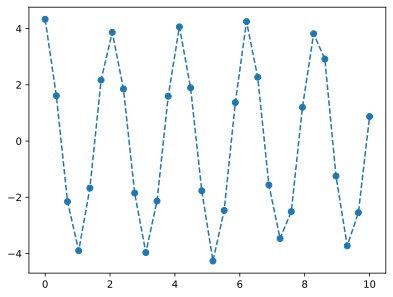

In [13]:
plt.plot(t_data, y_data, 'o--')

The angular frequency is $\omega = 2 \pi f$, so the frequency is $f = \frac{\omega}{2 \pi}$. We also know that the frequency is the reciprocal of the period, so we can write $f = \frac{1}{T}$. 

As evident from plotting the raw data, the period is roughly 2 seconds, so $T \approx 2$ s, $f \approx 0.5$ Hz and $\omega \approx \pi$ rad/s

The amplitude is the maximum displacement of the spring, which is $A \approx 4$ m, whereas the phase shift is $\phi \approx 0$.

All these values can be used as an initial guess for the curve fitting algorithm.

In [14]:
def func(t, A, omega, phi):
    return A * np.cos(omega*t + phi)
A0 = 4
omega0 = np.pi 
phi0 = 0
p0 = (A0, omega0, phi0)
p_opt, p_cov = curve_fit(func, t_data, y_data, p0)
print(p_opt)
print(p_cov)
A, omega, phi = p_opt

[3.94980912 2.99917741 0.10412397]
[[ 2.65327850e-03 -5.03106997e-06  3.52730942e-05]
 [-5.03106997e-06  1.87942942e-05 -9.72687363e-05]
 [ 3.52730942e-05 -9.72687363e-05  6.71660143e-04]]


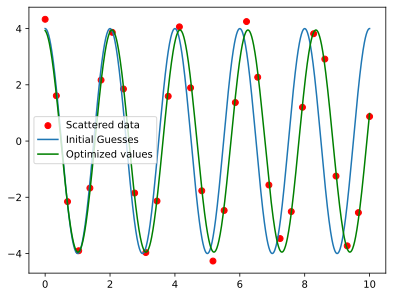

In [15]:
t_dense = np.linspace(0, 10, 1000)
y_dense = func(t_dense, A0, omega0, phi0) # using the initial guesses over a denser t span
Y_dense = func(t_dense, A, omega, phi)    # using the optimized values found by curve fit
plt.scatter(t_data, y_data, color='red')
plt.plot(t_dense, y_dense)
plt.plot(t_dense, Y_dense, color='green')
plt.legend(['Scattered data','Initial Guesses', 'Optimized values'])

In [16]:
# p_cov is the covariance matrix and its diagonal (the variance) is the squared error on the given arguments (A, omega, phi)

err = np.sqrt(np.diag(p_cov))
err # error, or actually standard deviation

array([0.05150998, 0.00433524, 0.02591641])

This example is a testament to how important it is to visualize your data before you start fitting it and to feed the algorithm a good initial guess.

Try the same example by using 1 as the initial guess for omega.

## Special Functions

Legendre polynomials are orthogonal polynomials of degree $n$ on the interval $[-1,1]$. They satisfy the following recurrence relation:

$P_l(x): (1-x^2)y'' - 2xy' + l(l+1)y = 0$

They are used in many applications, as an example you can find the angular component of the spherical Schrödinger equation which permits non-infinite solutions to the Schrödinger equation for the hydrogen atom.

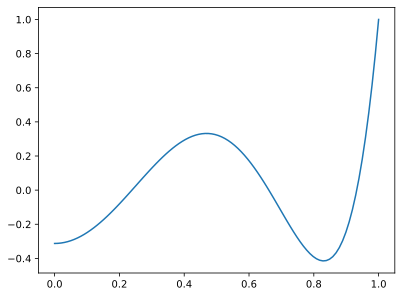

In [17]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))

Bessel functions: $J_\alpha(x)$: $x^2y'' + xy' + (x^2 - \alpha^2)y = 0$

Bessel functions are a family of solutions to the Bessel differential equation. They are used in many applications, as an example you can evaluate Laplace's equation in Polar Coordinates.

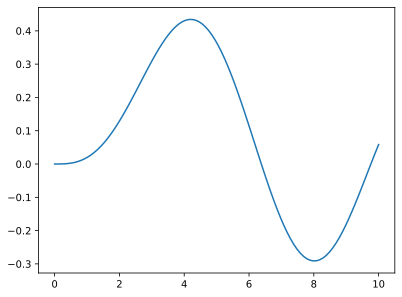

In [18]:
from scipy.special import jv 
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3, x))

## Calculus

### Differentiation

A very interesting consideration about derivation in **SciPy** is that it uses a different approach to differentiation compared to **NumPy**, where the most common function is `np.gradient`, which computes derivatives using finite differences.

On the other hand, **SciPy** provides more advanced differentiation methods, such as the central difference formula, which provides a more accurate estimate of the derivative. In addition to this, the optimized routines in **SciPy** generally lead to better results and fsster convergence.

In [19]:
from scipy.misc import derivative

In [20]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0, 1, 100)

The **SciPy** approach is more useful when working with explicitly defined functions, as it allows you to compute derivatives of functions that are not defined at a point, whereas the **NumPy** approach is more useful when working with data points stored in arrays.

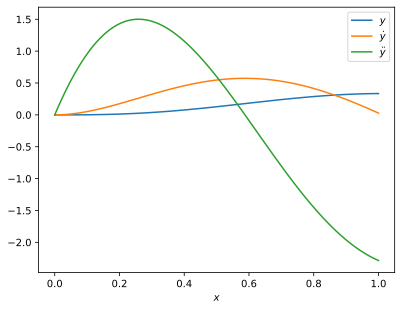

In [32]:
y = f(x)
dx = 1e-6
ydot = derivative(f, x, dx)
yddot = derivative(f, x, dx, n = 2)
plt.plot(x, y)
plt.plot(x, ydot)
plt.plot(x, yddot)
plt.xlabel("$x$")
plt.legend(['$y$', '$\dot{y}$', '$ \ddot{y}$'])

## Integration

Integration in **SciPy** is similar to differentiation, in that it provides more advanced integration methods compared to **NumPy**.
For instance in **NumPy** you can use the `np.trapz` function to compute the integral of a function using the trapezoidal rule, or the cumulative sum of an array using the `np.cumsum` function, multiplying the result by the step size. 

The `np.trapz` in particular uses the trapezoidal rule with an even number of points, and the Simpson's rule with an odd number of points. 
Both numpy routines are very fast and striaghtforward, but their limitation is that they only work with evenly spaced data points. 

In contrast, **SciPy**'s integration module provides a more comprehensive set of integration functions, including `quad`, `quadrature`, 
`romberg`, `cumulative_trapezoid`, `trapz`, and more. 

These function support a wider range of integration techinques, including adaptive quadrature, Romberg integration and Gaussian quadrature.

They also offer more flexibility in terms of the types of data they can handle, as they can work with unevenly spaced data points, not well-behaved functions, and functions that are not defined at a point. 

Single integrals:  $\displaystyle\int_0^1 x^2 sin(2x) e^{-x} dx$

In [37]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
bnds = (0, 1)
integral, integral_error = quad(integrand, bnds[0], bnds[1])
print(integral)
print(integral_error)

0.14558175869954834
1.6162822047366225e-15


Double integrals: $\displaystyle\int_0^1 \int_{-x}^{x^2} \sin(x + y^2)dydx$

In [41]:
from scipy.integrate import dblquad
integrand = lambda x, y: np.sin(x + y**2)
bnds_y = ((lambda x: -x), (lambda x: x))
bnds_x = (0, 1)
integral, integral_error = dblquad(integrand, bnds_x[0], bnds_x[1], bnds_y[0], bnds_y[1])
print(integral)
print(integral_error)

0.4113285456776755
1.5656549454840436e-14


You can integrate up to an arbitrary number of dimensions, using the `nquad` routine.

In [44]:
from scipy.integrate import nquad
#nquad?

## Differential Equations

### **First Order ODEs**

Let's see an example of a first order ODE with the equation of free falling motion under air friction:
$\dot{v} - \alpha v^2 + \beta = 0$

with the initial condition $v(0) = 0$.

In [45]:
from scipy.integrate import odeint

In [46]:
# Let's set alpha and beta arbitrarily for this example
alpha = 3
beta = 5

def vdot(v, t): 
    return alpha * v**2 - 5

v0 = 0 


In [47]:
t = np.linspace(0, 1, 100) # time span for which the equation is solved
sol = odeint(vdot, v0, t)
print(sol)

[[ 0.        ]
 [-0.05047933]
 [-0.10080451]
 [-0.15082334]
 [-0.20038726]
 [-0.24935318]
 [-0.29758502]
 [-0.34495519]
 [-0.39134576]
 [-0.43664948]
 [-0.48077056]
 [-0.52362515]
 [-0.56514164]
 [-0.60526086]
 [-0.6439356 ]
 [-0.68113064]
 [-0.71682205]
 [-0.75099661]
 [-0.78365109]
 [-0.8147914 ]
 [-0.84443176]
 [-0.87259378]
 [-0.89930556]
 [-0.92460079]
 [-0.94851787]
 [-0.97109913]
 [-0.99239002]
 [-1.01243837]
 [-1.03129376]
 [-1.04900692]
 [-1.06562918]
 [-1.081212  ]
 [-1.0958066 ]
 [-1.10946355]
 [-1.12223249]
 [-1.13416195]
 [-1.14529906]
 [-1.15568941]
 [-1.16537698]
 [-1.17440397]
 [-1.18281086]
 [-1.19063623]
 [-1.19791686]
 [-1.20468768]
 [-1.21098179]
 [-1.21683053]
 [-1.22226349]
 [-1.22730856]
 [-1.23199199]
 [-1.23633849]
 [-1.24037122]
 [-1.24411192]
 [-1.24758094]
 [-1.25079735]
 [-1.25377896]
 [-1.25654241]
 [-1.25910322]
 [-1.2614759 ]
 [-1.26367394]
 [-1.26570992]
 [-1.26759557]
 [-1.26934179]
 [-1.27095869]
 [-1.27245574]
 [-1.27384168]
 [-1.27512464]
 [-1.27631

In [48]:
# The form might look weird but it makes sense for more variables, let's get the result in a more readable structure
sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

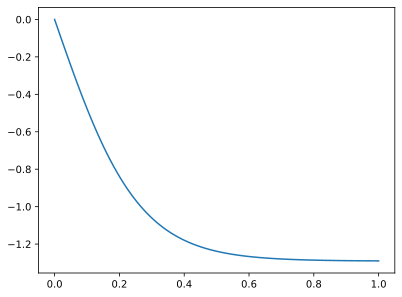

In [49]:
plt.plot(t, sol.T[0])

### **Coupled First Order ODEs**

$y_1' = y_1 + y_2^2 + 3x \ \ \ \ \ \ \ \ \ \ \ \ \ \ y_1(0) = 0$

$y_2' = 3y_1 + y_2^3 - \cos(x) \ \ \ \ \ \ y_2(0) = 0$

Letting $S = (y_1, y_2)$, we need a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$.

In [52]:
def Sdot(S, x):
    y1, y2 = S 
    return [y1 + y2**2 + 3*x, 
           3*y1 + y2**3 - np.cos(x)]

y1_0 = 0
y2_0 = 0

S_0 = (y1_0, y2_0)

In [55]:
x = np.linspace(0, 1, 100)
sol = odeint(Sdot, S_0, x)
y1 = sol.T[0]
y2 = sol.T[1]

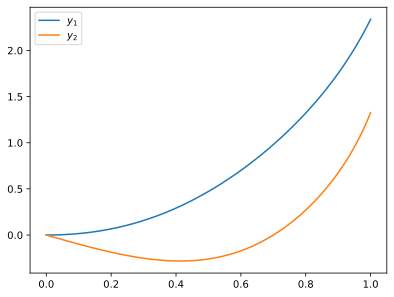

In [56]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['$y_1$', '$y_2$'])

Remember that any N order ODE can be converted into a system of N first order coupled ODEs, so this approach is extremely useful!